In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('final_features.csv')
df.drop(["Unnamed: 0"], inplace=True, axis=1)
df = df.dropna()
X = df.drop(["date", "start_station_name", "city", "weekday"], axis=1)
y = df[["total_bike_trips"]]

In [3]:
def decision_tree(X, y, test_size=0.33, max_depth=None, shouldPrint=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    if shouldPrint:
        print("Score: " + str(classifier.score(X_test, y_test)))
        print("Maximum depth: " + str(classifier.get_depth()))
        print("Number of leaves: " + str(classifier.get_n_leaves()))
    return (classifier, X_train, X_test, y_train, y_test)

def print_misclassified(classifier, X_test, y_test):
    pred = classifier.predict(X_test)
    for x in zip(pred, y_test["total_bike_trips"]):
        if x[0] != x[1]:
            print("Predicted " + str(x[0]) + " but correct value was " + str(x[1]))

In [4]:
classifier, X_train, X_test, y_train, y_test = decision_tree(X,y, shouldPrint=True)
print_misclassified(classifier, X_test, y_test)

Score: 0.9997486489883122
Maximum depth: 38
Number of leaves: 44
Predicted 39 but correct value was 40
Predicted 52 but correct value was 45
Predicted 52 but correct value was 44
Predicted 39 but correct value was 40


In [5]:
classifier, X_train, X_test, y_train, y_test = decision_tree(X,y,max_depth=10, shouldPrint=True)
print_misclassified(classifier, X_test, y_test)

Score: 0.9612919442000754
Maximum depth: 10
Number of leaves: 11
Predicted 11 but correct value was 17
Predicted 11 but correct value was 17
Predicted 11 but correct value was 28
Predicted 11 but correct value was 29
Predicted 11 but correct value was 12
Predicted 11 but correct value was 23
Predicted 11 but correct value was 13
Predicted 11 but correct value was 25
Predicted 11 but correct value was 22
Predicted 11 but correct value was 12
Predicted 11 but correct value was 15
Predicted 11 but correct value was 21
Predicted 11 but correct value was 23
Predicted 11 but correct value was 20
Predicted 11 but correct value was 29
Predicted 11 but correct value was 21
Predicted 11 but correct value was 16
Predicted 11 but correct value was 17
Predicted 11 but correct value was 13
Predicted 11 but correct value was 13
Predicted 11 but correct value was 15
Predicted 11 but correct value was 38
Predicted 11 but correct value was 14
Predicted 11 but correct value was 13
Predicted 11 but correc

In [11]:
accuracy = []
for depth in range(1,37):
    classifier, X_train, X_test, y_train, y_test = decision_tree(X,y, max_depth=depth)
    accuracy.append(classifier.score(X_test,y_test))

Text(0.5, 1.0, 'Accuracy with Different Maximum Depths of Decision Tree')

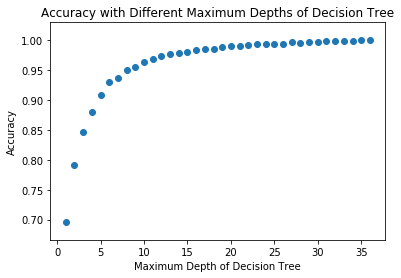

In [12]:
plt.scatter(range(1,37), error)
plt.xlabel("Maximum Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.title("Accuracy with Different Maximum Depths of Decision Tree")